# Retail Customer Data Analysis and Database Modeling
#### Subtitle: From Data Cleaning to Relational Database Design
---------------------------------------------------------------

## Overview

This project focuses on cleaning and structuring a retail transaction dataset, followed by designing a relational database to organize the cleaned data effectively. The ultimate goal is to provide a robust data model that supports a detailed analysis of customer behavior and purchasing patterns.

## Business Problem
The dataset contains numerous duplicate values and inconsistencies, such as multiple email addresses or phone numbers for the same customer. These issues complicate the analysis of customer data and hinder the development of accurate customer profiles. To address these challenges, we need to clean the data and create a new, unique identifier for each customer. Additionally, we aim to design a relational database to facilitate efficient data management and querying.

## Data Cleaning Steps


### 1. Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import pypyodbc as odbc
import hashlib
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
df=pd.read_csv('retail_data.csv')

In [2]:
df=pd.read_csv('retail_data.csv')

### 2. Exploring and Initial Cleaning

- Remove any rows with **null values** in critical columns.
- Remove any duplicated rows.
- Standardize the formatting of columns such as **Email and Phone**.
- Splitting the **name** column to create **First_name** and **Last_name** columns.

In [3]:
print(f'numbers of row: {df.shape[0]} and the numbers of column: {df.shape[1]}')

numbers of row: 302010 and the numbers of column: 30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [5]:
# chaking for null value
df.isna().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [6]:
# droping all null value
df.dropna(inplace =True)

In [7]:
# chaking for duplicated value
df.duplicated().sum()

3

In [8]:
# droping all duplicated value
df.drop_duplicates(inplace=True)

In [9]:
# Standardizing email to lowercase
df['Email'] = df['Email'].str.lower()
# converting phone datatype to string
df['Phone'] = df['Phone'].astype(str)
# Standardizing phone numbers by removing any non-numeric characters
df['Phone'] = df['Phone'].str.replace(r'\D', '', regex=True)

In [10]:
#sperating name to first name and last name
df['First_name'] = df['Name'].apply(lambda x: x.split(' ')[0].strip())
df['Last_name'] = df['Name'].apply(lambda x: x.split(' ')[1].strip())

### 3. Converting datatype:
- Converting datatype for **Transaction_ID, Customer_ID, Zipcode, Age, and Total_Purchases.**

In [11]:
df.dtypes

Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone                object
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
First_name           object
Last_name            object
dtype: object

In [12]:
# converting datatype
df['Transaction_ID'] = df['Transaction_ID'].astype(np.int64)
df['Customer_ID'] = df['Customer_ID'].astype(np.int64)
df['Zipcode'] = df['Zipcode'].astype(np.int64)
df['Age'] = df['Age'].astype(np.int64)
df['Total_Purchases'] = df['Total_Purchases'].astype(np.int64)

### 4. Handling Dates

- Clean the Date column and create a new **Purchase_Date** column.

In [13]:
df['Date']

0          9/18/2023
1         12/31/2023
2          4/26/2023
3           05-08-23
4           01-10-24
             ...    
302005     1/20/2024
302006    12/28/2023
302007     2/27/2024
302008      09-03-23
302009      01-08-24
Name: Date, Length: 293908, dtype: object

In [14]:
# chaking which format the date has been stored
df[df['Date'].str.contains('-')][['Date','Month']]

,Date,Month
3,05-08-23,May
4,01-10-24,January
8,01-06-24,January
9,10-04-23,October
12,01-02-24,January
...,...,...
301997,06-02-23,June
302000,03-05-23,March
302002,09-06-23,September
302008,09-03-23,September


From both cases when the separator is '-' and '/' the format for the date value is mm-dd-yy 

In [15]:
# Step 1: Ensure the 'Date' column is of string type
df['Date'] = df['Date'].astype(str)

# Step 2: Filter the dates containing '/'
df_slash = df[df['Date'].str.contains('/')]

# Convert the filtered dates to datetime
df_slash['Date'] = pd.to_datetime(df_slash['Date'], errors='coerce')

# Step 3: Filter the dates containing '-'
df_dash = df[df['Date'].str.contains('-')]

# Convert the filtered dates to datetime
df_dash['Date'] = pd.to_datetime(df_dash['Date'], errors='coerce')

# Combine the two filtered dataframes if necessary
df = pd.concat([df_slash, df_dash])

In [16]:
df['Time']

0         22:03:55
1          8:42:04
2          4:06:29
5         23:24:27
6         13:35:51
            ...   
301997     8:30:10
302000    14:47:57
302002    17:37:41
302008    11:20:31
302009    11:44:36
Name: Time, Length: 293908, dtype: object

In [17]:
# creating new column for storing date and the time for the purchase
df['Purchase_Date']=df['Date'].astype(str)+' '+df['Time']
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Purchase_Date']

0        2023-09-18 22:03:55
1        2023-12-31 08:42:04
2        2023-04-26 04:06:29
5        2023-09-21 23:24:27
6        2023-06-26 13:35:51
                 ...        
301997   2023-06-02 08:30:10
302000   2023-03-05 14:47:57
302002   2023-09-06 17:37:41
302008   2023-09-03 11:20:31
302009   2024-01-08 11:44:36
Name: Purchase_Date, Length: 293908, dtype: datetime64[ns]

### 2. Investigating IDs

- Investigate **Customer_ID** and **Transaction_ID** to identify inconsistencies.

In [18]:
# chacking for unique value for all the columns
df.nunique()

Transaction_ID      287005
Customer_ID          86485
Name                156638
Email                52530
Phone               291620
Address             291610
City                   130
State                   54
Zipcode              93580
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83435
Total_Purchases         10
Amount              291615
Total_Amount        291618
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
First_name             695
Last_name             1523
Purchase_Date       290298
dtype: int64

from above we can see that the total number of unique **customer ID** is much less than the **Name**, let's investigate the reason behind that.

In [19]:
df.loc[df.duplicated(subset=['Customer_ID','First_name','Last_name','Gender','Address'])]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,First_name,Last_name,Purchase_Date
299660,5130707,66851,Ms. Christine Maldonado,daniel90@gmail.com,33026008500,03560 Stout Hollow,Plymouth,England,32189,UK,25,Male,Medium,New,2023-04-24,2023.0,April,12:40:01,6,128.376821,770.260925,Clothing,Nike,T-shirt,Average,Standard,Credit Card,Shipped,2.0,Plain tee,Ms.,Christine,2023-04-24 12:40:01
299661,5215095,76511,Lori Powers,paul56@gmail.com,74974585070,70685 Latoya Views,Arlington,Virginia,24640,USA,59,Female,Medium,Regular,2023-07-29,2023.0,July,15:32:13,9,458.098362,4122.885260,Home Decor,IKEA,Lighting,Good,Same-Day,Credit Card,Pending,3.0,Recessed lighting,Lori,Powers,2023-07-29 15:32:13
299663,5330085,25619,Danielle Blankenship,james91@gmail.com,71552940190,883 Ellen Course Apt. 700,Nashville,Washington,99007,USA,70,Male,Low,Premium,2023-03-31,2023.0,March,10:53:42,8,410.829923,3286.639384,Electronics,Sony,Television,Bad,Standard,Credit Card,Shipped,1.0,Smart TV,Danielle,Blankenship,2023-03-31 10:53:42
299667,2137585,27503,Nicholas Gonzalez,jennifer32@gmail.com,79496018310,62485 Kyle Rapids Suite 222,Canberra,New South Wales,16955,Australia,55,Male,Medium,Regular,2023-10-23,2023.0,October,15:20:57,2,383.613002,767.226005,Home Decor,IKEA,Furniture,Excellent,Same-Day,Credit Card,Delivered,5.0,Desk,Nicholas,Gonzalez,2023-10-23 15:20:57
299668,3226223,73406,Daniel Cook,joshua12@gmail.com,75896853120,7662 Krista Rest Suite 740,Portsmouth,England,46565,UK,65,Male,Low,New,2023-03-16,2023.0,March,3:08:05,6,255.652135,1533.912809,Home Decor,IKEA,Lighting,Excellent,Same-Day,Credit Card,Processing,5.0,Recessed lighting,Daniel,Cook,2023-03-16 03:08:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301997,7349938,50236,Faith Pugh,cathy100@gmail.com,87860311740,669 Melinda Park Suite 448,Kitchener,Ontario,31602,Canada,39,Female,High,New,2023-06-02,2023.0,June,8:30:10,3,167.224885,501.674654,Books,Penguin Books,Children's,Good,Express,Cash,Shipped,3.0,Puzzles,Faith,Pugh,2023-06-02 08:30:10
302000,9862022,99656,Amber Fields,donald38@gmail.com,64723967850,50022 Antonio Valley Suite 498,Plymouth,England,92925,UK,43,Male,Medium,New,2023-03-05,2023.0,March,14:47:57,7,21.686500,151.805498,Grocery,Nestle,Chocolate,Bad,Express,Cash,Pending,1.0,Chocolate mousse,Amber,Fields,2023-03-05 14:47:57
302002,8961631,79479,Jason Welch,jason36@gmail.com,62792941040,764 Garcia Flat,Hamilton,Ontario,61218,Canada,63,Male,Low,New,2023-09-06,2023.0,September,17:37:41,6,443.329498,2659.976987,Home Decor,Home Depot,Tools,Excellent,Express,Cash,Pending,5.0,Level,Jason,Welch,2023-09-06 17:37:41
302008,9301950,45477,Patrick Wilson,rebecca65@gmail.com,93732220230,3204 Baird Port,Halifax,Ontario,67608,Canada,41,Male,Medium,New,2023-09-03,2023.0,September,11:20:31,1,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand,Patrick,Wilson,2023-09-03 11:20:31


In [20]:
df.query('Customer_ID == 27503')

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,First_name,Last_name,Purchase_Date
11972,2137585,27503,Nicholas Gonzalez,jennifer32@gmail.com,79496018310,62485 Kyle Rapids Suite 222,Portsmouth,England,16955,UK,19,Male,Medium,Regular,2023-10-23,2023.0,October,15:20:57,2,383.613002,767.226005,Home Decor,IKEA,Furniture,Excellent,Same-Day,Debit Card,Delivered,5.0,Dining table,Nicholas,Gonzalez,2023-10-23 15:20:57
84197,3845902,27503,Jennifer Henderson,debra61@gmail.com,41190581700,93184 Heather Square Suite 918,Chicago,Connecticut,64582,USA,34,Female,Low,Regular,2023-12-19,2023.0,December,21:00:06,1,446.950607,446.950607,Grocery,Pepsi,Water,Good,Standard,Cash,Shipped,4.0,Flavored water,Jennifer,Henderson,2023-12-19 21:00:06
266358,9835868,27503,Leslie Brown,justin73@gmail.com,68266622660,43483 Carrillo Estate,Hanover,Berlin,43938,Germany,44,Male,Medium,Premium,2023-04-19,2023.0,April,4:16:10,3,335.226359,1005.679078,Electronics,Mitsubhisi,Mitsubishi 1.5 Ton 3 Star Split AC,Excellent,Same-Day,Credit Card,Delivered,4.0,Ductless AC,Leslie,Brown,2023-04-19 04:16:10
299667,2137585,27503,Nicholas Gonzalez,jennifer32@gmail.com,79496018310,62485 Kyle Rapids Suite 222,Canberra,New South Wales,16955,Australia,55,Male,Medium,Regular,2023-10-23,2023.0,October,15:20:57,2,383.613002,767.226005,Home Decor,IKEA,Furniture,Excellent,Same-Day,Credit Card,Delivered,5.0,Desk,Nicholas,Gonzalez,2023-10-23 15:20:57
200620,4941555,27503,Jonathan Perry,james6@gmail.com,67046819810,407 Charles Turnpike Suite 374,Los Angeles,Florida,34725,USA,65,Male,High,Regular,2024-02-02,2024.0,February,16:34:10,6,221.741619,1330.449715,Electronics,Samsung,Tablet,Bad,Same-Day,PayPal,Processing,1.0,Asus ZenPad,Jonathan,Perry,2024-02-02 16:34:10
256546,7647292,27503,Melissa Evans,michael88@gmail.com,45084409660,23979 White Fort,Münster,Berlin,57070,Germany,68,Male,Low,Premium,2023-05-12,2023.0,May,9:56:57,7,398.006166,2786.043165,Books,Random House,Literature,Good,Same-Day,Cash,Processing,4.0,Contemporary literature,Melissa,Evans,2023-05-12 09:56:57


From Avobe's investigation, we can conclude there many duplicated values of customer ID. customer ID should be unique for every customer but here we can clearly see that for customer ID = 27503, there are 5 different people, and for **Nicholas Gonzalez** we can see there are two different ages for the same person.
thats why we have to crate a new customere id to identify each individual customer.

In [21]:
df.loc[df.duplicated(subset=['Transaction_ID','Customer_ID','Purchase_Date'])]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,First_name,Last_name,Purchase_Date
299660,5130707,66851,Ms. Christine Maldonado,daniel90@gmail.com,33026008500,03560 Stout Hollow,Plymouth,England,32189,UK,25,Male,Medium,New,2023-04-24,2023.0,April,12:40:01,6,128.376821,770.260925,Clothing,Nike,T-shirt,Average,Standard,Credit Card,Shipped,2.0,Plain tee,Ms.,Christine,2023-04-24 12:40:01
299661,5215095,76511,Lori Powers,paul56@gmail.com,74974585070,70685 Latoya Views,Arlington,Virginia,24640,USA,59,Female,Medium,Regular,2023-07-29,2023.0,July,15:32:13,9,458.098362,4122.885260,Home Decor,IKEA,Lighting,Good,Same-Day,Credit Card,Pending,3.0,Recessed lighting,Lori,Powers,2023-07-29 15:32:13
299663,5330085,25619,Danielle Blankenship,james91@gmail.com,71552940190,883 Ellen Course Apt. 700,Nashville,Washington,99007,USA,70,Male,Low,Premium,2023-03-31,2023.0,March,10:53:42,8,410.829923,3286.639384,Electronics,Sony,Television,Bad,Standard,Credit Card,Shipped,1.0,Smart TV,Danielle,Blankenship,2023-03-31 10:53:42
299667,2137585,27503,Nicholas Gonzalez,jennifer32@gmail.com,79496018310,62485 Kyle Rapids Suite 222,Canberra,New South Wales,16955,Australia,55,Male,Medium,Regular,2023-10-23,2023.0,October,15:20:57,2,383.613002,767.226005,Home Decor,IKEA,Furniture,Excellent,Same-Day,Credit Card,Delivered,5.0,Desk,Nicholas,Gonzalez,2023-10-23 15:20:57
299668,3226223,73406,Daniel Cook,joshua12@gmail.com,75896853120,7662 Krista Rest Suite 740,Portsmouth,England,46565,UK,65,Male,Low,New,2023-03-16,2023.0,March,3:08:05,6,255.652135,1533.912809,Home Decor,IKEA,Lighting,Excellent,Same-Day,Credit Card,Processing,5.0,Recessed lighting,Daniel,Cook,2023-03-16 03:08:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301997,7349938,50236,Faith Pugh,cathy100@gmail.com,87860311740,669 Melinda Park Suite 448,Kitchener,Ontario,31602,Canada,39,Female,High,New,2023-06-02,2023.0,June,8:30:10,3,167.224885,501.674654,Books,Penguin Books,Children's,Good,Express,Cash,Shipped,3.0,Puzzles,Faith,Pugh,2023-06-02 08:30:10
302000,9862022,99656,Amber Fields,donald38@gmail.com,64723967850,50022 Antonio Valley Suite 498,Plymouth,England,92925,UK,43,Male,Medium,New,2023-03-05,2023.0,March,14:47:57,7,21.686500,151.805498,Grocery,Nestle,Chocolate,Bad,Express,Cash,Pending,1.0,Chocolate mousse,Amber,Fields,2023-03-05 14:47:57
302002,8961631,79479,Jason Welch,jason36@gmail.com,62792941040,764 Garcia Flat,Hamilton,Ontario,61218,Canada,63,Male,Low,New,2023-09-06,2023.0,September,17:37:41,6,443.329498,2659.976987,Home Decor,Home Depot,Tools,Excellent,Express,Cash,Pending,5.0,Level,Jason,Welch,2023-09-06 17:37:41
302008,9301950,45477,Patrick Wilson,rebecca65@gmail.com,93732220230,3204 Baird Port,Halifax,Ontario,67608,Canada,41,Male,Medium,New,2023-09-03,2023.0,September,11:20:31,1,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand,Patrick,Wilson,2023-09-03 11:20:31


In [22]:
df.query('Transaction_ID == 2882826	')

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,First_name,Last_name,Purchase_Date
117011,2882826,53626,Dustin Merritt,william14@gmail.com,95189266450,143 Amanda Crescent,Tucson,West Virginia,25242,USA,46,Female,Low,Premium,2024-01-08,2024.0,January,11:44:36,7,340.319059,2382.233417,Home Decor,Home Depot,Decorations,Excellent,Same-Day,Debit Card,Delivered,4.0,Vases,Dustin,Merritt,2024-01-08 11:44:36
302009,2882826,53626,Dustin Merritt,william14@gmail.com,95189266450,143 Amanda Crescent,Tucson,West Virginia,25242,USA,28,Female,Low,Premium,2024-01-08,2024.0,January,11:44:36,7,340.319059,2382.233417,Home Decor,Home Depot,Decorations,Average,Same-Day,Cash,Shipped,2.0,Clocks,Dustin,Merritt,2024-01-08 11:44:36


From Avobe's investigation we can conclude there many duplicated values of transaction ID.As a unique identifier in this dataset it is not suitable for a transaction id have so many duplicated values which is why I created a new unique transaction ID considering each entry of this data set indicated a transaction.

### 6. Creating New IDs

- Create new unique identifiers for each **transaction, customer, product, order, and feedback**.

In [23]:
# Function to create a new customer ID
def create_new_customer_id(row):
    customer_key = (row['First_name'], row['Last_name'],row['Gender'], row['Address'])
    return hash(customer_key) & 0xffffffffffffffff  # Convert to positive integer

# Apply the function to create a new column 'New_Customer_ID'
df['New_Customer_ID'] = df.apply(create_new_customer_id, axis=1)


In [24]:
#Transaction_ID is an identifier that represents a specific transaction.
#A transaction typically refers to a purchase event where one or more products are bought by a customer at a particular time.

# Function to create a new Transaction_ID
def create_new_transaction_id(row):
    customer_key = (row['New_Customer_ID'], row['Purchase_Date'])
    return hash(customer_key) & 0xffffffffffffffff  # Convert to positive integer

# Apply the function to create a new column 'New_Customer_ID'
df['New_Transaction_ID'] = df.apply(create_new_customer_id, axis=1)

In [25]:
# considering each row of this dataset is an individual order record.
df['Order_ID']= range(1,len(df)+1)

In [26]:
# Function to create a new product ID
def create_new_product_id(row):
    product_key = (row['products'], row['Product_Type'], row['Product_Category'],row['Product_Brand'])
    return hash(product_key) & 0xffffffffffffffff  # Convert to positive integer

# Apply the function to create a new column 'New_Customer_ID'
df['product_ID'] = df.apply(create_new_product_id, axis=1)

In [27]:
# Function to create a new feedback ID
def create_new_feedback_id(row):
    feedback_key = (row['New_Customer_ID'], row['product_ID'], row['Ratings'],row['Feedback'])
    return hash(feedback_key) & 0xffffffffffffffff  # Convert to positive integer

# Apply the function to create a new column 'New_Customer_ID'
df['Feedback_ID'] = df.apply(create_new_feedback_id, axis=1)

### 7. Dropping Columns:
- Dropping **Date, Year, Month, Time, Name, Transaction_ID, and Customer_ID**columns.

In [28]:
# removing column from dataset
df.drop(columns=['Date','Year','Month','Time','Name','Transaction_ID','Customer_ID'],axis=1,inplace =True)

## Creating Individual DataFrames for Each Table
---------------------------


### 1. Customer :

In [29]:
customer = df[['New_Customer_ID','First_name','Last_name','Age','Gender','Income','Customer_Segment',
               'Email','Phone','Address','Zipcode','City','State','Country']]

In [30]:
customer.duplicated().sum()

953

In [31]:
customer.drop_duplicates(subset='New_Customer_ID',inplace = True)

In [32]:
customer.rename(columns={'New_Customer_ID':'Customer_ID'},inplace = True)

In [33]:
customer.columns[0]

'Customer_ID'

In [34]:
customer.shape

(291663, 14)

In [35]:
customer.dtypes

Customer_ID         uint64
First_name          object
Last_name           object
Age                  int64
Gender              object
Income              object
Customer_Segment    object
Email               object
Phone               object
Address             object
Zipcode              int64
City                object
State               object
Country             object
dtype: object

In [36]:
# changing the datatype for simplifying the data insertion proseec
customer['Phone']= customer['Phone'].astype(str)
customer['Customer_ID']= customer['Customer_ID'].astype(str)

In [37]:
customer.head()

,Customer_ID,First_name,Last_name,Age,Gender,Income,Customer_Segment,Email,Phone,Address,Zipcode,City,State,Country
0,17555406120783491481,Michelle,Harrington,21,Male,Low,Regular,ebony39@gmail.com,14147868010,3959 Amanda Burgs,77985,Dortmund,Berlin,Germany
1,1416975382218005175,Kelsey,Hill,19,Female,Low,Premium,mark36@gmail.com,68528999870,82072 Dawn Centers,99071,Nottingham,England,UK
2,10485637824527505673,Scott,Jensen,48,Male,Low,Regular,shane85@gmail.com,83621604490,4133 Young Canyon,75929,Geelong,New South Wales,Australia
5,9105849342432485399,Ryan,Johnson,58,Female,Medium,Premium,haley12@gmail.com,32926770060,532 Ashley Crest Suite 014,74430,Brisbane,New South Wales,Australia
6,7054703932244883602,Erin,Lewis,29,Female,Low,New,arthur76@gmail.com,15783554230,600 Brian Prairie Suite 497,47545,Kitchener,Ontario,Canada


### 2. Product:

In [38]:
product = df[['product_ID','products','Product_Type','Product_Category','Product_Brand']]

In [39]:
product.duplicated().sum()

293428

In [40]:
product.drop_duplicates(subset='product_ID',inplace = True)

In [41]:
product.shape

(480, 5)

In [42]:
product.dtypes

product_ID          uint64
products            object
Product_Type        object
Product_Category    object
Product_Brand       object
dtype: object

In [43]:
# Converting data types for convenience sake
product['product_ID'] = product['product_ID'].astype(str)

In [44]:
product.head()

,product_ID,products,Product_Type,Product_Category,Product_Brand
0,18076733154740945255,Cycling shorts,Shorts,Clothing,Nike
1,10424948405737982124,Lenovo Tab,Tablet,Electronics,Samsung
2,11949188193398230383,Sports equipment,Children's,Books,Penguin Books
5,9459851936358194325,Lenovo Tab,Tablet,Electronics,Apple
6,1545110314035596329,QLED TV,Television,Electronics,Samsung


### 3. Order:

In [45]:
order = df[['Order_ID','New_Transaction_ID','product_ID','Total_Purchases','Amount','Total_Amount']]

In [46]:
order.duplicated().sum()

0

In [47]:
order.rename(columns={'New_Transaction_ID':'Transaction_ID'},inplace = True)

In [48]:
order.shape

(293908, 6)

In [49]:
order.dtypes

Order_ID             int64
Transaction_ID      uint64
product_ID          uint64
Total_Purchases      int64
Amount             float64
Total_Amount       float64
dtype: object

In [50]:
# Converting data types for convenience sake
order['Transaction_ID']= order['Transaction_ID'].astype(str)
order['product_ID']= order['product_ID'].astype(str)

In [51]:
order.head()

,Order_ID,Transaction_ID,product_ID,Total_Purchases,Amount,Total_Amount
0,1,17555406120783491481,18076733154740945255,3,108.028757,324.086270
1,2,1416975382218005175,10424948405737982124,2,403.353907,806.707815
2,3,10485637824527505673,11949188193398230383,3,354.477600,1063.432799
5,4,9105849342432485399,9459851936358194325,4,296.291806,1185.167224
6,5,7054703932244883602,1545110314035596329,2,315.057648,630.115295


### 4.Transaction:

In [52]:
Transaction = df[['New_Transaction_ID','New_Customer_ID','product_ID','Purchase_Date','Order_Status','Shipping_Method','Payment_Method']]

In [53]:
Transaction.duplicated().sum()

34

In [54]:
Transaction.drop_duplicates(subset='New_Transaction_ID',inplace = True)

In [55]:
Transaction.rename(columns={'New_Transaction_ID':'Transaction_ID','New_Customer_ID':'Customer_ID'},inplace = True)

In [56]:
Transaction.shape

(291663, 7)

In [57]:
Transaction.dtypes

Transaction_ID             uint64
Customer_ID                uint64
product_ID                 uint64
Purchase_Date      datetime64[ns]
Order_Status               object
Shipping_Method            object
Payment_Method             object
dtype: object

In [58]:
# Converting data types for convenience sake
Transaction['Transaction_ID']= Transaction['Transaction_ID'].astype(str)
Transaction['Customer_ID']= Transaction['Customer_ID'].astype(str)
Transaction['product_ID']= Transaction['product_ID'].astype(str)

In [59]:
Transaction.head()

,Transaction_ID,Customer_ID,product_ID,Purchase_Date,Order_Status,Shipping_Method,Payment_Method
0,17555406120783491481,17555406120783491481,18076733154740945255,2023-09-18 22:03:55,Shipped,Same-Day,Debit Card
1,1416975382218005175,1416975382218005175,10424948405737982124,2023-12-31 08:42:04,Processing,Standard,Credit Card
2,10485637824527505673,10485637824527505673,11949188193398230383,2023-04-26 04:06:29,Processing,Same-Day,Credit Card
5,9105849342432485399,9105849342432485399,9459851936358194325,2023-09-21 23:24:27,Pending,Express,PayPal
6,7054703932244883602,7054703932244883602,1545110314035596329,2023-06-26 13:35:51,Processing,Standard,Cash


### 5.Feedback:

In [60]:
feedback = df[['Feedback_ID','New_Customer_ID','product_ID','Ratings','Feedback']]

In [61]:
feedback.drop_duplicates(subset='Feedback_ID',inplace = True)

In [62]:
feedback.duplicated().sum()

0

In [63]:
feedback.rename(columns={'New_Customer_ID':'Customer_ID'},inplace = True)

In [64]:
feedback.shape

(293811, 5)

In [65]:
feedback.dtypes

Feedback_ID     uint64
Customer_ID     uint64
product_ID      uint64
Ratings        float64
Feedback        object
dtype: object

In [66]:
# Converting data types for convenience sake
feedback['Feedback_ID']= feedback['Feedback_ID'].astype(str)
feedback['Customer_ID']= feedback['Customer_ID'].astype(str)
feedback['product_ID']= feedback['product_ID'].astype(str)

In [67]:
feedback.head()

,Feedback_ID,Customer_ID,product_ID,Ratings,Feedback
0,2274044967625047111,17555406120783491481,18076733154740945255,5.0,Excellent
1,3483606670547620620,1416975382218005175,10424948405737982124,4.0,Excellent
2,199978234362443541,10485637824527505673,11949188193398230383,2.0,Average
5,1239704235345452458,9105849342432485399,9459851936358194325,4.0,Good
6,8637626592768075593,7054703932244883602,1545110314035596329,1.0,Bad


## Creating the Relational Database
-------------------------------

### 1. Setting Up the Database

In [68]:
# Connection string
connection_string = 'Driver={SQL Server};Server=DESKTOP-IN3852M\SQLEXPRESS;Database=master;Trusted_Connection=yes;'


# Establish connection
conn = odbc.connect(connection_string, autocommit=True)  # Enable autocommit directly in the connection string

# Create cursor
cursor = conn.cursor()

# Execute CREATE DATABASE statement
try:
    cursor.execute('IF EXISTS (SELECT * FROM sys.databases WHERE name = \'Retail\') DROP DATABASE Retail')
    cursor.execute('CREATE DATABASE Retail')
    print("Database created successfully")
except Exception as e:
    print(f"An error occurred: {e}")

# Close the cursor and connection
cursor.close()
conn.close()

Database created successfully


### 2. Creating Tables and Inserting Data into Tables

In [69]:
def create_and_insert_table(df, table_name):
    # Connection string
    connection_string = 'Driver={SQL Server};Server=DESKTOP-IN3852M\\SQLEXPRESS;Database=Retail;Trusted_Connection=yes;'

    # Establish connection
    conn = odbc.connect(connection_string, autocommit=True)  # Enable autocommit directly in the connection string

    # Create cursor
    cursor = conn.cursor()

    # Constructing the CREATE TABLE statement
    create_table_query = f"IF EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = '{table_name}') BEGIN DROP TABLE {table_name}; END CREATE TABLE {table_name} (\n"

    for column, dtype in df.dtypes.items():
        sql_dtype = dtype_mapping[str(dtype)]
        if column == df.columns[0]:
            create_table_query += f"    {column} {sql_dtype} PRIMARY KEY,\n"
        else:
            create_table_query += f"    {column} {sql_dtype},\n"

    # Removing the trailing comma and adding the closing parenthesis
    create_table_query = create_table_query.rstrip(",\n") + "\n);"
    # Execute CREATE TABLE statement
    try:
        cursor.execute(create_table_query)
        print(f"Table {table_name} created successfully")
    except Exception as e:
        print(f"An error occurred while creating the table {table_name}: {e}")

    # Column names
    columns_name = ', '.join(df.columns)
    # Number of columns
    num_columns = len(df.columns)
    markers = ', '.join(['?'] * num_columns)
    # SQL query
    insert_query = f"INSERT INTO {table_name} ({columns_name}) VALUES ({markers})"

    # Execute many
    try:
        # Execute insertion query
        cursor.executemany(insert_query, df.values.tolist())
        print(f"Data inserted successfully into {table_name}")
    except Exception as e:
        print(f"An error occurred while inserting data into {table_name}: {e}")

    # Close the cursor and connection
    cursor.close()
    conn.close()


In [70]:

# Define the dtype_mapping dictionary to map pandas types to SQL types
dtype_mapping = {
    #'uint64': 'DECIMAL(20,0)',
    'float64': 'FLOAT',
    'object': 'NVARCHAR(255)',
    'datetime64[ns]': 'DATETIME',
    'int64': 'INT'

}
# DataFrames and corresponding table names
data_frames = {
    'Customer': customer,
    'Product': product,
    'Orders': order,
    'Transactions': Transaction,
    'Feedback': feedback
}

# Loop through each DataFrame and create/insert into the corresponding table
for table_name, df in data_frames.items():
    create_and_insert_table(df, table_name)

Table Customer created successfully
Data inserted successfully into Customer
Table Product created successfully
Data inserted successfully into Product
Table Orders created successfully
Data inserted successfully into Orders
Table Transactions created successfully
Data inserted successfully into Transactions
Table Feedback created successfully
Data inserted successfully into Feedback


## Conclusion
------------------
By cleaning the dataset and designing a relational database, we address the following issues:

- Eliminate duplicate transaction records, ensuring each transaction is uniquely identifiable.
- Consolidate customer data, even when customers use multiple emails or phone numbers.
- Facilitate efficient querying and analysis by organizing data into related tables.

##  Benefits
---------------
- **Improved Data Quality:** Removing duplicates and standardizing data formats enhance the accuracy of customer profiles.
- **Efficient Data Management:** A relational database structure supports more efficient data storage and retrieval.
- **Enhanced Analytical Capabilities:** Clean, well-structured data allows for more precise analysis of customer behavior and trends.

## Schema Diagram
--------------
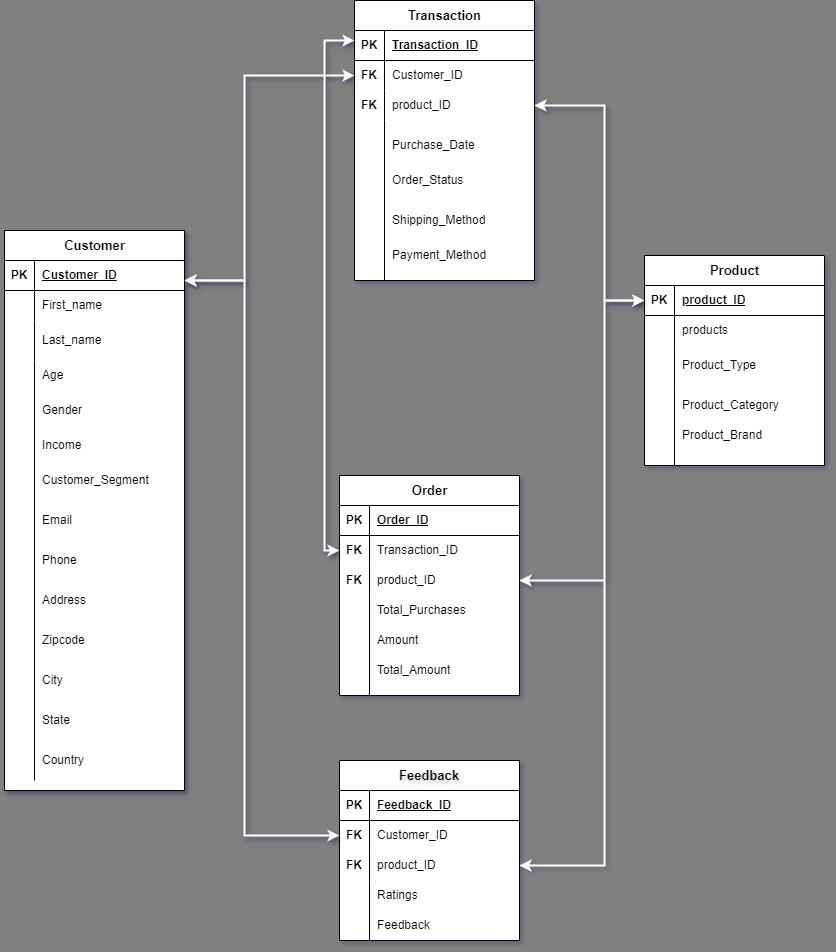
